In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
economy = pd.read_csv('Economy.csv')

In [65]:
economy.head()

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition
0,Atlanta,GA,10.2,0.040,0.049,0.089,59345.0,10309.0
1,Austin,TX,6.3,0.063,0.020,0.083,65886.0,8729.0
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0
3,Birmingham,AL,NaN,4.050,0.060,0.100,NaN,NaN
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0


In [66]:
economy.dtypes

City                     object
State                    object
Percent unemployment    float64
State sale tax rate     float64
Local tax rate          float64
Total rate              float64
Median Income           float64
AvgTuition              float64
dtype: object

In [81]:
economy['Rank_Unemployment'] = economy['Percent unemployment'].rank(ascending = 1)
economy['Rank_Sales'] = economy['Local tax rate'].rank(ascending = 1)
economy['Rank_Income'] = economy['Median Income'].rank(ascending = 1) 
economy['Rank_Tuition'] = economy['AvgTuition'].rank(ascending = 0)
economy.head()

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition,Rank_Unemployment,Rank_Sales,Rank_Income,Rank_Tution,Sum,Economy_rank,Economy_ref,Lat,Lon,Rank_Tuition
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0,6.0,4.5,25.0,1.0,36.5,1.0,50.0,42.360482,-71.059568,1.0
33,Pittsburgh,PA,7.0,0.060,0.010,0.070,51907.0,10852.0,8.0,17.0,11.0,11.5,47.5,2.0,49.0,40.441694,-79.990086,11.5
48,Virginia Beach,VA,5.7,0.053,0.007,0.060,76637.0,13255.0,2.5,13.0,31.0,9.0,55.5,3.0,48.0,36.795302,-76.050925,9.0
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0,34.5,4.5,10.0,10.0,59.0,4.0,47.0,39.290882,-76.610759,10.0
15,Houston,TX,7.6,0.063,0.020,0.083,48889.0,8729.0,14.0,27.5,8.0,21.5,71.0,5.5,45.5,29.758938,-95.367697,21.5


In [82]:
economy['Rank_Unemployment'].fillna(economy['Rank_Unemployment'].max() + 1, inplace=True)
economy['Rank_Sales'].fillna(economy['Rank_Sales'].max() + 1, inplace=True)
economy['Rank_Income'].fillna(economy['Rank_Income'].max() + 1, inplace=True)
economy['Rank_Tuition'].fillna(economy['Rank_Tuition'].max() + 1, inplace=True)

In [84]:
economy['Sum'] = (economy['Rank_Unemployment'] + economy['Rank_Sales'] + 
                  economy['Rank_Income'] + economy['Rank_Tuition'])

In [85]:
#economy.dtypes

In [86]:
economy['Economy_rank'] = economy['Sum'].rank(ascending = 1)

In [87]:
economy['Economy_ref'] = economy['Sum'].rank(ascending = 0)

In [88]:
economy.head()

,City,State,Percent unemployment,State sale tax rate,Local tax rate,Total rate,Median Income,AvgTuition,Rank_Unemployment,Rank_Sales,Rank_Income,Rank_Tution,Sum,Economy_rank,Economy_ref,Lat,Lon,Rank_Tuition
4,Boston,MA,6.6,0.063,0.000,0.063,62180.0,20442.0,6.0,4.5,25.0,1.0,36.5,1.0,50.0,42.360482,-71.059568,1.0
33,Pittsburgh,PA,7.0,0.060,0.010,0.070,51907.0,10852.0,8.0,17.0,11.0,11.5,47.5,2.0,49.0,40.441694,-79.990086,11.5
48,Virginia Beach,VA,5.7,0.053,0.007,0.060,76637.0,13255.0,2.5,13.0,31.0,9.0,55.5,3.0,48.0,36.795302,-76.050925,9.0
2,Baltimore,MD,11.1,0.060,0.000,0.060,50492.0,12273.0,34.5,4.5,10.0,10.0,59.0,4.0,47.0,39.290882,-76.610759,10.0
15,Houston,TX,7.6,0.063,0.020,0.083,48889.0,8729.0,14.0,27.5,8.0,21.5,71.0,5.5,45.5,29.758938,-95.367697,21.5


In [73]:
economy.to_csv('Economy_Rank.csv')

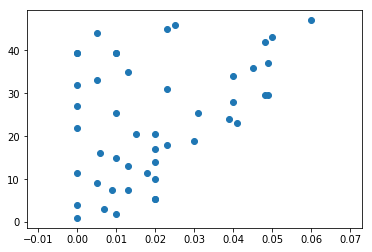

In [89]:
#Basic Graph Analysis
%matplotlib inline  
plt.scatter(economy['Local tax rate'],economy['Economy_rank'])

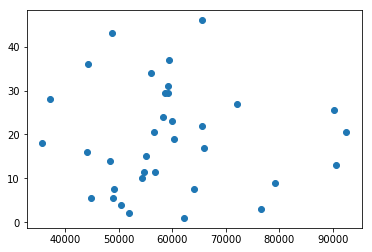

In [75]:
plt.scatter(economy['Median Income'], economy['Economy_rank'])

In [76]:
#Get the Geodata
import pandas as pd
from geopy.geocoders import Nominatim
geolocator = Nominatim()
n = len(economy)
cname = []
for i in range(0, n):
    cname.append(economy['City'][i])
b = []
c = []
for j in range(0, n):
    city = cname[j] 
    if city == 'San Francisco':
        loc = geolocator.geocode(94105)
        b.append(loc.latitude)
        c.append(loc.longitude)
    else:
        loc = geolocator.geocode(city + ' United States')
        b.append(loc.latitude)
        c.append(loc.longitude)
economy['Lat'] = b
economy['Lon'] = c
# economy.to_csv('economy_loc.csv')

In [91]:
#Geo plotting
import plotly
import plotly.plotly as py
import pandas as pd


economy = economy.sort_values('Economy_rank', ascending = 1)
df = economy
df.head()
df['text'] =df['City'] + '<br># Final Rank ' + (df['Economy_rank']).astype(str)+ '<br># Sales_Rank ' +\
             (df['Rank_Sales']).astype(str)+ '<br># Unemployment_Rank ' + (df['Rank_Unemployment']).astype(str)+\
             '<br># Income_Rank ' + (df['Rank_Income']).astype(str)+'<br># Tuition_Rank ' + (df['Rank_Tuition']).astype(str)

# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,10),(10,20),(20,30),(30,40),(40,50)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

def combine(ls):
    text = ls[0] + ':' + str(int(ls[1]))
    return text


for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['Lon'],
        lat = df_sub['Lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['Economy_ref']*30,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = 'City Ranking by Economy',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
plotly.offline.plot( fig, validate=False, filename='d3-bubble-map-populations.html' )

'file://C:\\Users\\dell\\Documents\\cse583\\Homework\\d3-bubble-map-populations.html'